<a href="https://colab.research.google.com/github/cheungngo/Studies/blob/main/one_stage_doseresmeta/one_stage_doseresmeta_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# One-stage doseresmeta

## Installing and loading packages

In [ ]:
library(devtools)

Loading required package: usethis



In [ ]:
devtools::install_github("alecri/dosresmeta")

mixmeta (NA -> 1.2.0) [CRAN]


Installing 1 packages: mixmeta

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpnDCGXe/remotes482cf1ccd4/alecri-dosresmeta-dcc47a9/DESCRIPTION’ ... OK
* preparing ‘dosresmeta’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘dosresmeta_2.1.1.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("lmtest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("rms")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)
library(dosresmeta)
library(lmtest)
library(gridExtra)
library(readxl)
library(knitr)
library(rms)
theme_set(theme_minimal())

Loading required package: Hmisc

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units


Loading required package: SparseM


Attaching package: ‘SparseM’


The following object is masked from ‘package:base’:

    backsolve



Attaching package: ‘rms’


The following object is masked from ‘package:lmtest’:

    lrtest




## Fictitious data example

In [ ]:
# true beta coefficients generating the simulated data 'sim_os'
bi <- structure(c(-3.02773781522055, -2.71360284216677, -2.81718024023898, 
                  -2.98525410370846, -3.07807174460969, -3.08090019565107, -2.76123148090383, 
                  -2.90138487974716, -3.23406524104945, -0.35, -0.246168150617906, 
                  -0.230850306644441, -0.35, -0.274625537367731, -0.267349209860969, 
                  -0.35, -0.233102337406713, -0.252156341820433, 0.025, 0.0259126663907604, 
                  0.0244049682211859, 0.025, 0.032217031434239, 0.0343394212681985, 
                  0.025, 0.0300706894228835, 0.0300235286430353), dim = c(9L, 3L),
                dimnames = list(1:9, paste("beta", 0:2)))
apply(bi, 2, mean)[-1]
apply(bi, 2, sd)[-1]
kable(bi) # a table generator from "knitr"

beta 1      beta 2 
-0.28380576  0.02799648

beta 1      beta 2 
0.051591568 0.003718789



|    beta 0|     beta 1|    beta 2|
|---------:|----------:|---------:|
| -3.027738| -0.3500000| 0.0250000|
| -2.713603| -0.2461682| 0.0259127|
| -2.817180| -0.2308503| 0.0244050|
| -2.985254| -0.3500000| 0.0250000|
| -3.078072| -0.2746255| 0.0322170|
| -3.080900| -0.2673492| 0.0343394|
| -2.761232| -0.3500000| 0.0250000|
| -2.901385| -0.2331023| 0.0300707|
| -3.234065| -0.2521563| 0.0300235|

In [ ]:
# load simulated data (Table 2)
data("sim_os") # from "dosresmeta"
kable(sim_os, digits = 2)



|xcati          | id|type | dose| cases|    n|   rr|  lrr|  urr| logrr|   se|
|:--------------|--:|:----|----:|-----:|----:|----:|----:|----:|-----:|----:|
|[-0.00336,3.5) |  1|cc   | 2.43|    42| 2260| 1.00| 1.00| 1.00|  0.00| 0.00|
|[3.5,7.01]     |  1|cc   | 5.21|   102| 6136| 0.89| 0.62| 1.28| -0.11| 0.19|
|[-2.39,2.73)   |  2|cc   | 1.70|    39|  651| 1.00| 1.00| 1.00|  0.00| 0.00|
|[2.73,7.83)    |  2|cc   | 5.14|   164| 3962| 0.68| 0.47| 0.97| -0.39| 0.18|
|[7.83,12.9]    |  2|cc   | 8.78|    26|  387| 1.13| 0.68| 1.89|  0.12| 0.26|
|[-2.14,1.64)   |  3|cc   | 0.78|    11|  224| 1.00| 1.00| 1.00|  0.00| 0.00|
|[1.64,5.41)    |  3|cc   | 3.89|    99| 2639| 0.75| 0.40| 1.43| -0.28| 0.33|
|[5.41,9.17)    |  3|cc   | 6.71|    80| 2031| 0.79| 0.42| 1.51| -0.23| 0.33|
|[9.17,12.9]    |  3|cc   | 9.82|    10|  106| 2.02| 0.83| 4.91|  0.70| 0.45|
|[2,5)          |  4|cc   | 3.75|    89| 4306| 1.00| 1.00| 1.00|  0.00| 0.00|
|[5,8.01]       |  4|cc   | 6.24|    62| 4316| 0.69| 0.50| 0.9

_D_e_s_c_r_i_p_t_i_o_n:

     The dataset contains simulated data from 9 case-control studies.

_F_o_r_m_a_t:

     A data frame with 27 observations on the following 11 variables:

       ‘xcati’  category limits for the continuous exposure.                          
       ‘id’     id of the studies.                                                    
       ‘type’   code for study design.                                                
       ‘dose’   assigned dose levels.                                                 
       ‘cases’  number of cases for each exposure level.                              
       ‘n’      total number of subjects for each exposure level.                     
       ‘rr’     adjusted risk estimates for each exposure level.                      
       ‘lrr’    lower bound for the confidence limits of the adjusted risk estimates. 
       ‘urr’    upper bound for the confidence limits of the adjusted risk estimates. 
       ‘logrr’  natural logarithm of the adjusted risk estimates.                     
       ‘se’     standard error for the logarithm of the adjusted risk estimates.      

In [ ]:
# number of non-referent log rr
group_by(sim_os, id) %>% 
  summarise(n_nonref = sum(se != 0))

id,n_nonref
<int>,<int>
1,1
2,2
3,3
4,1
5,2
6,3
7,1
8,2
9,3


### Estimation: one-stage vs two-stage

In [ ]:
# 1 stage

mod_os <- dosresmeta(logrr ~ dose + I(dose^2), id = id, cases = cases, n = n, type = type,
                     se = se, data = sim_os, proc = "1stage")
summary(mod_os)

Warning message in dosresmeta.fit(X[v != 0, , drop = FALSE], Z[v != 0, , drop = FALSE], :
“convergence not reached after maximum number of iterations”


Call:  dosresmeta(formula = logrr ~ dose + I(dose^2), id = id, type = type, 
    cases = cases, n = n, data = sim_os, se = se, proc = "1stage")

One-stage random-effects meta-analysis
Estimation method: REML
Covariance approximation: Greenland & Longnecker

Chi2 model: X2 = 36.6043 (df = 2), p-value = 0.0000

Fixed-effects coefficients
           Estimate  Std. Error        z  Pr(>|z|)  95%ci.lb  95%ci.ub     
dose        -0.3294      0.0737  -4.4676    0.0000   -0.4739   -0.1849  ***
I(dose^2)    0.0341      0.0061   5.6168    0.0000    0.0222    0.0460  ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1 

Between-study random-effects (co)variance components
           Std. Dev  Corr
dose         0.1316  dose
I(dose^2)    0.0064    -1

9 studies, 18 values, 2 fixed and 3 random-effects parameters
 logLik      AIC      BIC  
-8.6754  27.3508  31.2137  


In [ ]:
# 2 stage

id_ts <- names(which(table(sim_os$id) > 2))
mod_ts <- dosresmeta(logrr ~ dose + I(dose^2), id = id, cases = cases, n = n, type = type,
                     se = se, data = subset(sim_os, id %in% id_ts), proc = "2stage")
summary(mod_ts)

Call:  dosresmeta(formula = logrr ~ dose + I(dose^2), id = id, type = type, 
    cases = cases, n = n, data = subset(sim_os, id %in% id_ts), 
    se = se, proc = "2stage")

Two-stage random-effects meta-analysis
Estimation method: REML
Covariance approximation: Greenland & Longnecker

Chi2 model: X2 = 41.8719 (df = 2), p-value = 0.0000

Fixed-effects coefficients
           Estimate  Std. Error        z  Pr(>|z|)  95%ci.lb  95%ci.ub     
dose        -0.2771      0.0622  -4.4575    0.0000   -0.3989   -0.1553  ***
I(dose^2)    0.0322      0.0058   5.5723    0.0000    0.0209    0.0435  ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1 

Between-study random-effects (co)variance components
           Std. Dev  Corr
dose         0.0228  dose
I(dose^2)    0.0012    -1

Univariate Cochran Q-test for residual heterogeneity:
Q = 6.0453 (df = 10), p-value = 0.8114
I-square statistic = 0.0%

6 studies, 12 values, 2 fixed and 3 random-effects parameters
  logLik       AIC     

In [ ]:
# It should be noted that only study with >2 categories are included in two step
table(sim_os$id)


1 2 3 4 5 6 7 8 9 
2 3 4 2 3 4 2 3 4 

In [ ]:
# comparison coefficients
data.frame(one_stage = mod_os$coefficients, two_stage = c(mod_ts$coefficients)) %>% 
  kable(digits = 3)



|          | one_stage| two_stage|
|:---------|---------:|---------:|
|dose      |    -0.329|    -0.277|
|I(dose^2) |     0.034|     0.032|

In [ ]:
# comparison standard errors
data.frame(one_stage = mod_os$vcov[c(1, 4)]^.5, two_stage = mod_ts$vcov[c(1, 4)]^.5) %>% 
  kable(digits = 3)



| one_stage| two_stage|
|---------:|---------:|
|     0.074|     0.062|
|     0.006|     0.006|

In [ ]:
# comparison variance components
data.frame(one_stage = mod_os$Psi[-2], two_stage = mod_ts$Psi[-2])

one_stage,two_stage
<dbl>,<dbl>
0.0173082587,5.220313e-04
-0.0008479796,-2.811876e-05
0.0000415454,1.514592e-06


In [ ]:
# graphical comparison using 1.5 as referent (Figure 2)
xref <- 1.5 # the reference for computing the RR / OR
newd <- data.frame(dose = c(xref, seq(0, max(sim_os$dose), length.out = 50)))
pred_os <- predict(mod_os, newd, xref = xref, expo = T)
pred_ts <- predict(mod_ts, newd, xref = xref, expo = T)
pred_true <- tibble(
  dose = newd$dose,
  pred = c(exp(cbind(dose - xref, dose^2- xref^2) %*% c(-0.27, 0.027)))
  )

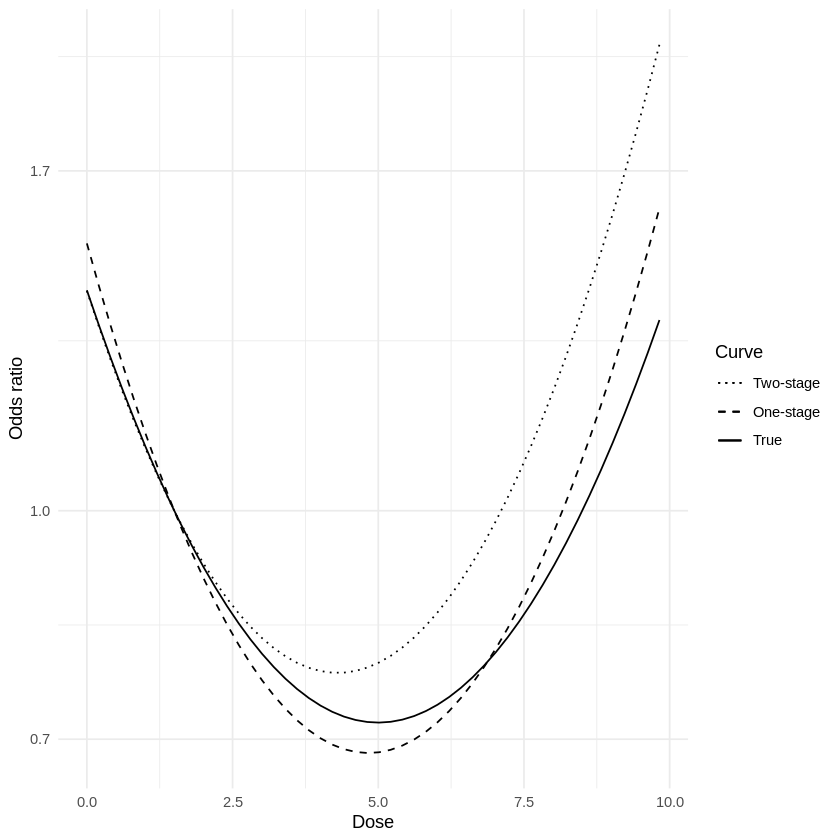

In [ ]:
ggplot(pred_ts, aes(dose, y = pred)) + 
  geom_line(aes(linetype = "Two-stage")) + 
  geom_line(data = pred_os, aes(linetype = "One-stage")) + 
  geom_line(data = pred_true, aes(linetype = "True")) + 
  scale_y_continuous(trans = "log", breaks = c(.7, 1, 1.7, 2.5)) +
  labs(y = "Odds ratio", x = "Dose", linetype = "Curve") +
  scale_linetype_manual(values = c(`Two-stage` = "dotted", `One-stage` = "dashed", True = "solid"))

In [ ]:
# individual curves (Table 3)
bi_blup <- t(apply(blup(mod_os), 1, function(x) x + rbind(coef(mod_os))))
bi_ts <- t(apply(blup(mod_ts), 1, function(x) x + rbind(coef(mod_ts)))) %>% 
  as.data.frame() %>% cbind(id = id_ts)
bi_comp <- data.frame(id = seq_along(unique(sim_os$id)),
                      xi_ref = sim_os$dose[sim_os$se == 0],
                      true = bi[, -1], blup = bi_blup) %>%
  merge(bi_ts, all = TRUE)
colnames(bi_comp)[-2] <- c("ID", paste0(rep(c("true", "os", "ts"), each = 2), c(".b1", ".b2")))
kable(bi_comp)



| ID|    xi_ref|    true.b1|   true.b2|      os.b1|     os.b2|      ts.b1|     ts.b2|
|--:|---------:|----------:|---------:|----------:|---------:|----------:|---------:|
|  1| 2.4260811| -0.3500000| 0.0250000| -0.3020774| 0.0327586|         NA|        NA|
|  2| 1.7002830| -0.2461682| 0.0259127| -0.3477669| 0.0349970| -0.2850610| 0.0326177|
|  3| 0.7772001| -0.2308503| 0.0244050| -0.3003771| 0.0326753| -0.2792174| 0.0323030|
|  4| 3.7491986| -0.3500000| 0.0250000| -0.4864290| 0.0417904|         NA|        NA|
|  5| 2.0108041| -0.2746255| 0.0322170| -0.2498844| 0.0302015| -0.2741494| 0.0320300|
|  6| 0.0759720| -0.2673492| 0.0343394| -0.2893578| 0.0321355| -0.2780751| 0.0322414|
|  7| 3.2280345| -0.3500000| 0.0250000| -0.5125295| 0.0430691|         NA|        NA|
|  8| 1.4898271| -0.2331023| 0.0300707| -0.1755108| 0.0265578| -0.2675352| 0.0316737|
|  9| 0.0293185| -0.2521563| 0.0300235| -0.3008702| 0.0326995| -0.2785178| 0.0322653|

In [ ]:
# auxiliary function for individual predictions
pred_sq <- function(coef, x, xref){
  y <- do.call("cbind", Map(function(b, r){
    exp(cbind(x - r, x^2- r^2) %*% t(b))
  }, split(coef, 1:nrow(coef)), split(xref, seq_along(xref))))
  colnames(y) <- paste0("pred", 1:ncol(y))
  data.frame(y)
}
predi <- data.frame(
  x = newd$dose,
  y_true = pred_sq(coef =  bi_comp[, c("true.b1", "true.b2")], newd$dose, bi_comp$xi_ref),
  y_os = pred_sq(coef =  bi_comp[, c("os.b1", "os.b2")], newd$dose, bi_comp$xi_ref),
  y_ts = pred_sq(coef =  bi_comp[, c("ts.b1", "ts.b2")], newd$dose, bi_comp$xi_ref)
) %>% 
  pivot_longer(
    cols = c("y_true.pred1":"y_ts.pred9"),
    names_to = c("pred_type", "id"),
    names_pattern = "y_(.*).pred(.*)"
  ) %>% 
  mutate(
    pred_type = factor(pred_type, levels = c("true", "os", "ts"), 
                       labels = c("True", "One-stage", "Two-stage")),
    study_lab = paste("Study ID", id)
  ) %>% 
  merge(sim_os, by = "id")

Warning message:
“Removed 102 row(s) containing missing values (geom_path).”


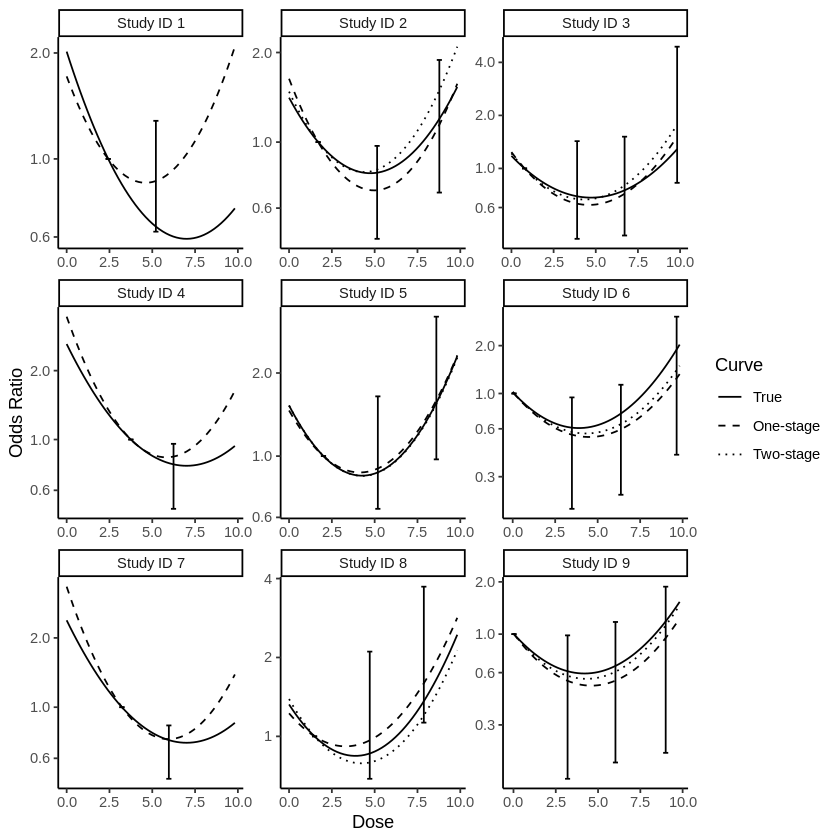

In [ ]:
# Figure 3
ggplot(predi, aes(x = dose, y = rr)) + 
  geom_errorbar(data = select(predi, dose, rr, lrr, urr, study_lab) %>% distinct(),
                aes(ymin = lrr, ymax = urr), width = .3) +
  geom_line(aes(x = x, y = value, linetype = pred_type)) +
  scale_y_continuous(trans = "log", breaks = c(.3, .6, 1, 2, 4)) +
  facet_wrap(. ~ study_lab, scale = "free") +
  scale_linetype_manual(values =  c(`True` = "solid", `One-stage` = "dashed", `Two-stage` = "dotted")) +
  labs(x = "Dose", y = "Odds Ratio", linetype = "Curve") + 
  theme_classic()

`geom_smooth()` using formula 'y ~ x'



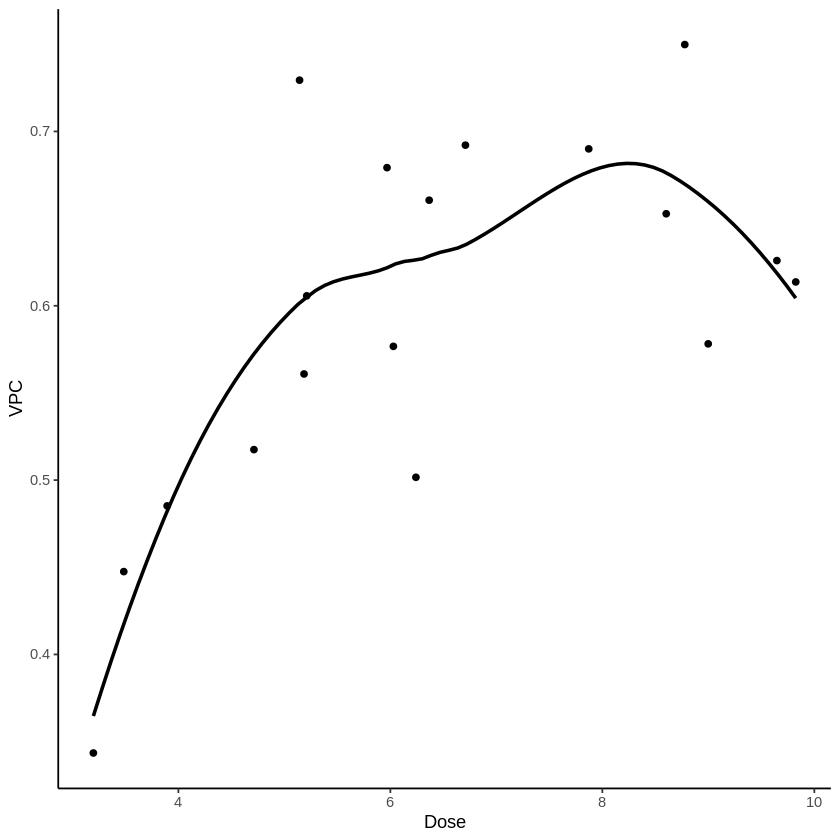

In [ ]:
# vpc plot(Figure 4)
p_vpc <- ggplot(subset(sim_os, se != 0), aes(dose, vpc(mod_os))) +
  geom_point() + geom_smooth(method = "loess", se = F, col = "black") +
  labs(y = "VPC", x = "Dose") + theme_classic()
p_vpc

In [ ]:
# Model comparison and goodness-of-fit
# more complex models: cubic, spline, fracpol
mod_cub <- dosresmeta(logrr ~ dose + I(dose^2) + I(dose^3), id = id, 
                      cases = cases, n = n, type = type, se = se, data = sim_os, 
                      proc = "1stage", method = "ml", 
                      control = list(maxiter = 1500))
k <- quantile(sim_os$dose, c(.05, .2, .5, .8, .95))
mod_spl <- dosresmeta(logrr ~ rcs(dose, k), id = id, cases = cases, n = n, 
                      type = type, se = se, data = sim_os, proc = "1stage",
                      method = "ml", control = list(maxiter = 5000))
p <- c(-2, -1, -0.5, 0, 0.5, 1, 2, 3)
grid <- subset(expand.grid(p1 = p, p2 = p), p1 <= p2)
rownames(grid) <- seq(nrow(grid))
shift <- 0
scale <- 1
modi_pi <- lapply(split(grid, seq(nrow(grid))), function(p)
  dosresmeta(logrr ~ fracpol(dose, p = p, shift = shift, scale = scale), id = id,
             type = type, se = se, cases = cases, n = n, data = sim_os, 
             proc = "1stage", method = "ml"))
grid[which.min(lapply(modi_pi, AIC)), ]
mod_fracpol <- modi_pi[[which.min(lapply(modi_pi, AIC))]]

pred_cub <- predict(mod_cub, newd, xref = xref, expo = T)
pred_spl <- predict(mod_spl, newd, xref = xref, expo = T)
pred_fracpol <- predict(mod_fracpol, subset(newd, dose >0), expo = T)

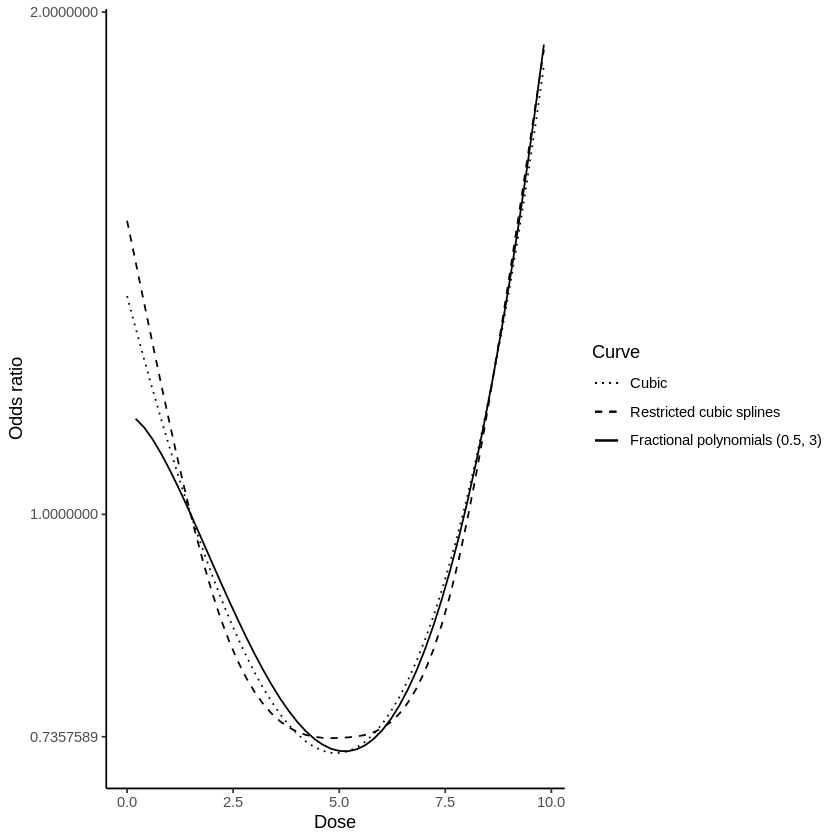

In [ ]:
# Figure 7
ggplot(pred_cub, aes(newd$dose, pred, linetype = "Cubic")) + geom_line() +
  geom_line(data = pred_spl, aes(linetype = "Restricted cubic splines")) +
  geom_line(data = pred_fracpol, aes(x = newd$dose[newd$dose>0], linetype = "Fractional polynomials (0.5, 3)")) +
  scale_y_continuous(trans = "log") + labs(x = "Dose", y = "Odds ratio", linetype = "Curve") +
  scale_linetype_manual(values = c(Cubic = "dotted", `Restricted cubic splines` = "dashed", `Fractional polynomials (0.5, 3)` = "solid")) +
  theme_classic()

In [ ]:
# comparison AICs
data.frame("cubic" = AIC(mod_cub), "spline" = AIC(mod_spl), 
           "frac pol" = AIC(mod_fracpol)) %>% 
  kable(digits = 3)



|  cubic| spline| frac.pol|
|------:|------:|--------:|
| 19.383| 29.205|    13.55|

In [ ]:
# gof plot
sq_gof <- gof(mod_os)
sq_gof

Goodness-of-fit statistics:

Deviance test: 
D = 27.186 (df = 16), p-value = 0.039

Coefficient of determination R-squared: 0.594 
Adjusted R-squared: 0.544

`geom_smooth()` using formula 'y ~ x'



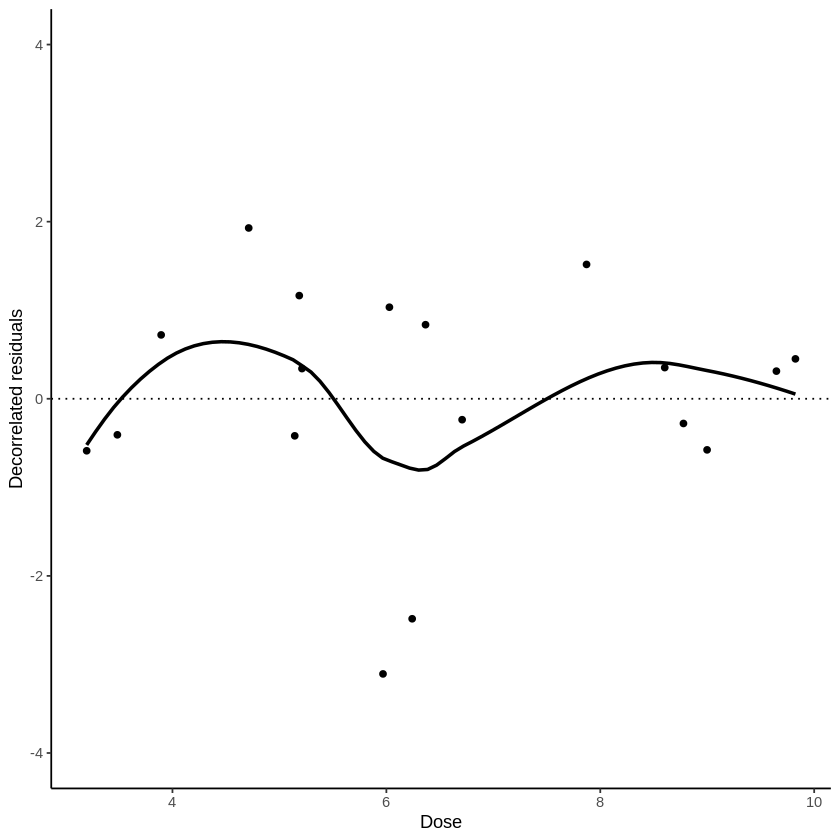

In [ ]:
# Figure 8
ggplot(subset(sim_os, se != 0), aes(dose, sq_gof$tdata$tresiduals)) + 
  geom_point() + geom_smooth(method = "loess", se = F, col = "black") +
  geom_hline(yintercept = 0, linetype = "dotted") +
  scale_y_continuous(lim = c(-4, 4)) +
  labs(y = "Decorrelated residuals", x = "Dose") + theme_classic() +
  theme(plot.title = element_text(hjust = 0.5))


### Example 2: coffee consumption and all-cause mortality

In [ ]:
# load data
# with the new version of dosresmeta just type `data("coffee_mort_add")`

load(url("https://github.com/alecri/one-stage-dosresmeta/raw/master/coffee_mort_add.rda"))

In [ ]:
# reconstructing covariances
k <- c(0.5, 2.0, 4.5) 
Slist <- lapply(unique(coffee_mort_add$id), function(i)
  with(subset(coffee_mort_add, id == i), {
    if (any(is.na(cases) | is.na(n))){
      diag(se[se != 0 & !is.na(se)]^2, nrow = sum(se != 0 & !is.na(se)))
    }
    else {
      covar.logrr(y = logrr, v = I(se^2), cases = cases, n = n,
                  type = type)
    }
  }))
names(Slist) <- unique(coffee_mort_add$id)

In [ ]:
# data for plot and prediction
newd <- data.frame(dose = seq(0, 8, length.out = 100))
newd_tab <- data.frame(dose = c(0, 2, 4))

In [ ]:
# Splines without exclusion
spl <- dosresmeta(logrr ~ rcs(dose, k), id = id, type = type,
                  cases = cases, n = n, se = se, data = coffee_mort_add, 
                  covariance = "user", Slist = Slist, proc = "1stage", method = "reml")
summary(spl)

Call:  dosresmeta(formula = logrr ~ rcs(dose, k), id = id, type = type, 
    cases = cases, n = n, data = coffee_mort_add, se = se, covariance = "user", 
    method = "reml", proc = "1stage", Slist = Slist)

One-stage random-effects meta-analysis
Estimation method: REML

Chi2 model: X2 = 18.4027 (df = 2), p-value = 0.0001

Fixed-effects coefficients
                   Estimate  Std. Error        z  Pr(>|z|)  95%ci.lb  95%ci.ub
rcs(dose, k)dose    -0.0905      0.0305  -2.9675    0.0030   -0.1503   -0.0307
rcs(dose, k)dose'    0.0737      0.0356   2.0699    0.0385    0.0039    0.1434
                     
rcs(dose, k)dose   **
rcs(dose, k)dose'   *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1 

Between-study random-effects (co)variance components
                   Std. Dev              Corr
rcs(dose, k)dose     0.0822  rcs(dose, k)dose
rcs(dose, k)dose'    0.0956           -0.9875

12 studies, 36 values, 2 fixed and 3 random-effects parameters
  logLik       AIC   

In [ ]:
# Splines with exclusion
spl_exc <- dosresmeta(logrr ~ rcs(dose, k), id = id, type = type, cases = cases, 
                      n = n, se = se, data = subset(coffee_mort_add, !(id %in% c(28, 29))), method = "reml",
                      covariance = "user", Slist = Slist[!names(Slist) %in% c("28", "29")])
summary(spl_exc)

Call:  dosresmeta(formula = logrr ~ rcs(dose, k), id = id, type = type, 
    cases = cases, n = n, data = subset(coffee_mort_add, !(id %in% 
        c(28, 29))), se = se, covariance = "user", method = "reml", 
    Slist = Slist[!names(Slist) %in% c("28", "29")])

Two-stage random-effects meta-analysis
Estimation method: REML

Chi2 model: X2 = 36.7180 (df = 2), p-value = 0.0000

Fixed-effects coefficients
                   Estimate  Std. Error        z  Pr(>|z|)  95%ci.lb  95%ci.ub
rcs(dose, k)dose    -0.1315      0.0235  -5.5993    0.0000   -0.1776   -0.0855
rcs(dose, k)dose'    0.1188      0.0266   4.4733    0.0000    0.0667    0.1709
                      
rcs(dose, k)dose   ***
rcs(dose, k)dose'  ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1 

Between-study random-effects (co)variance components
                   Std. Dev              Corr
rcs(dose, k)dose     0.0326  rcs(dose, k)dose
rcs(dose, k)dose'    0.0337           -0.8919

Univariate Cochran Q-test

In [ ]:
# comparison predicted RRS
round(predict(spl, newd_tab, expo = T), 2)
round(predict(spl_exc, newd_tab, expo = T), 2)

,"rcs(dose, k)dose","rcs(dose, k)dose'",pred,ci.lb,ci.ub
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0.00,1.00,1.00,1.00
2,2,0.21,0.85,0.76,0.94
3,4,1.88,0.80,0.71,0.90


,"rcs(dose, k)dose","rcs(dose, k)dose'",pred,ci.lb,ci.ub
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0.00,1.00,1.00,1.00
2,2,0.21,0.79,0.73,0.86
3,4,1.88,0.74,0.67,0.81


In [ ]:
# comparison coefficients
round(rbind(spl = c(coef(spl), vcov(spl)[-2]),
            spl_exc = c(coef(spl_exc), vcov(spl_exc)[-2])), 5)

,"rcs(dose, k)dose","rcs(dose, k)dose'",,,
spl,-0.09049,0.07367,0.00093,-0.00105,0.00127
spl_exc,-0.13153,0.11880,0.00055,-0.00059,0.00071


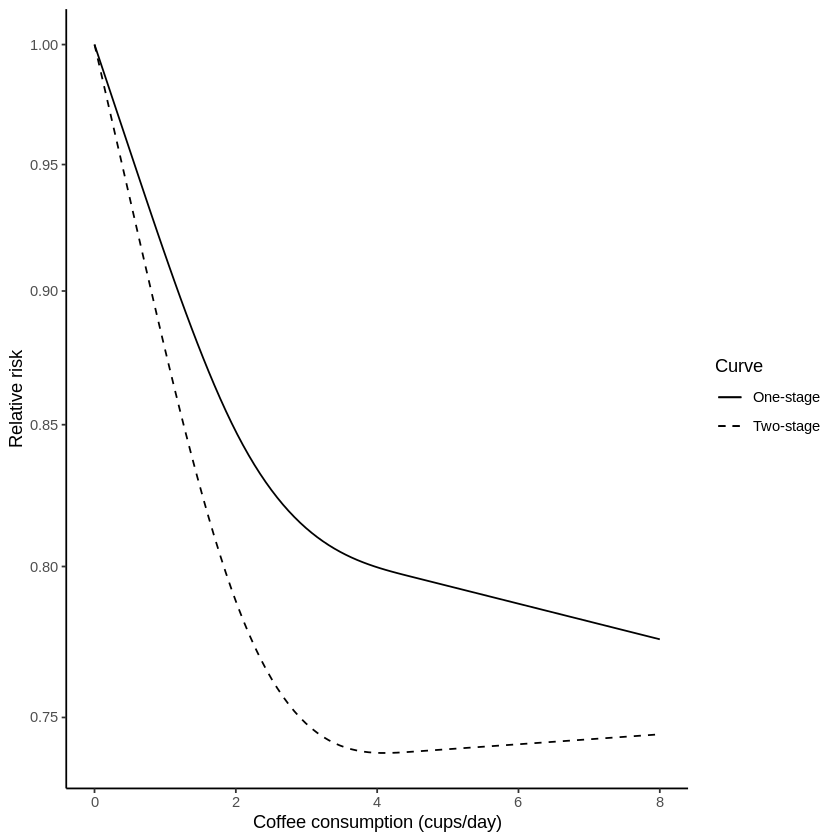

In [ ]:
# Figure 5
pred_spl <- predict(spl, newd, expo = T)
pred_spl_excl <- predict(spl_exc, newd, expo = T)
ggplot(pred_spl, aes(newd$dose, pred, linetype = "One-stage")) + 
  geom_line() +
  geom_line(data = pred_spl_excl, aes(linetype = "Two-stage")) +
  scale_y_continuous(trans = "log", breaks = c(1, .75, .8, .85, .9, .95)) + 
  labs(x = "Coffee consumption (cups/day)", y = "Relative risk", linetype = "Curve") +
  scale_linetype_manual(values = c(`One-stage` = "solid", `Two-stage` = "dashed")) +
  theme_classic()

In [ ]:
# alternative models (ML estimation for likelihood comparison)
newd <- data.frame(dose = c(1, seq(0, 8, length.out = 100)))
spl_ml <- dosresmeta(logrr ~ rcs(dose, k), id = id, type = type, cases = cases, n = n, 
                     se = se, data = coffee_mort_add, covariance = "user",  Slist = Slist,
                     proc = "1stage", method = "ml")
pred_spl_ml <- data.frame(dose = newd$dose, pred_spl = predict(spl_ml, newd, expo = T)$pred)

In [ ]:
# spike at zero
spl_spike <- dosresmeta(logrr ~ I(1*(dose < 1)) + I(rcs(dose, k)*(dose >= 1)), 
                        id = id, type = type,
                        cases = cases, n = n, se = se, data = coffee_mort_add, 
                        covariance = "user", proc = "1stage", method = "ml",
                        Slist = Slist, control = list(maxiter = 5000))
summary(spl_spike)
pred_spl_spike <- predict(spl_spike, newd, expo = T)

Call:  dosresmeta(formula = logrr ~ I(1 * (dose < 1)) + I(rcs(dose, 
    k) * (dose >= 1)), id = id, type = type, cases = cases, n = n, 
    data = coffee_mort_add, se = se, covariance = "user", method = "ml", 
    proc = "1stage", Slist = Slist, control = list(maxiter = 5000))

One-stage random-effects meta-analysis
Estimation method: ML

Chi2 model: X2 = 18.8993 (df = 3), p-value = 0.0003

Fixed-effects coefficients
                                    Estimate  Std. Error        z  Pr(>|z|)
I(1 * (dose < 1))                     0.0413      0.1238   0.3337    0.7386
I(rcs(dose, k) * (dose >= 1))dose    -0.0620      0.0610  -1.0163    0.3095
I(rcs(dose, k) * (dose >= 1))dose'    0.0484      0.0619   0.7810    0.4348
                                    95%ci.lb  95%ci.ub   
I(1 * (dose < 1))                    -0.2013    0.2839   
I(rcs(dose, k) * (dose >= 1))dose    -0.1816    0.0576   
I(rcs(dose, k) * (dose >= 1))dose'   -0.0730    0.1697   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.0

In [ ]:
# categorical
k2 <- c(0, 1, 3, 5, 7, 10)
categ <- dosresmeta(logrr ~ relevel(cut(dose, breaks = k2, include.lowest = T, right = F), 2), 
                    id = id, type = type,
                    cases = cases, n = n, se = se, data = coffee_mort_add, 
                    covariance = "user", proc = "1stage", method = "reml",
                    Slist = Slist, control = list(maxiter = 5000))
summary(categ)
pred_categ <- predict(categ, newd, expo = T)

Call:  dosresmeta(formula = logrr ~ relevel(cut(dose, breaks = k2, include.lowest = T, 
    right = F), 2), id = id, type = type, cases = cases, n = n, 
    data = coffee_mort_add, se = se, covariance = "user", method = "reml", 
    proc = "1stage", Slist = Slist, control = list(maxiter = 5000))

One-stage random-effects meta-analysis
Estimation method: REML

Chi2 model: X2 = 25.4558 (df = 4), p-value = 0.0000

Fixed-effects coefficients
                                                                         Estimate
relevel(cut(dose, breaks = k2, include.lowest = T, right = F), 2)[0,1)     0.1451
relevel(cut(dose, breaks = k2, include.lowest = T, right = F), 2)[3,5)    -0.0657
relevel(cut(dose, breaks = k2, include.lowest = T, right = F), 2)[5,7)    -0.0415
relevel(cut(dose, breaks = k2, include.lowest = T, right = F), 2)[7,10]   -0.1272
                                                                         Std. Error
relevel(cut(dose, breaks = k2, include.lowest = T, right = F), 2

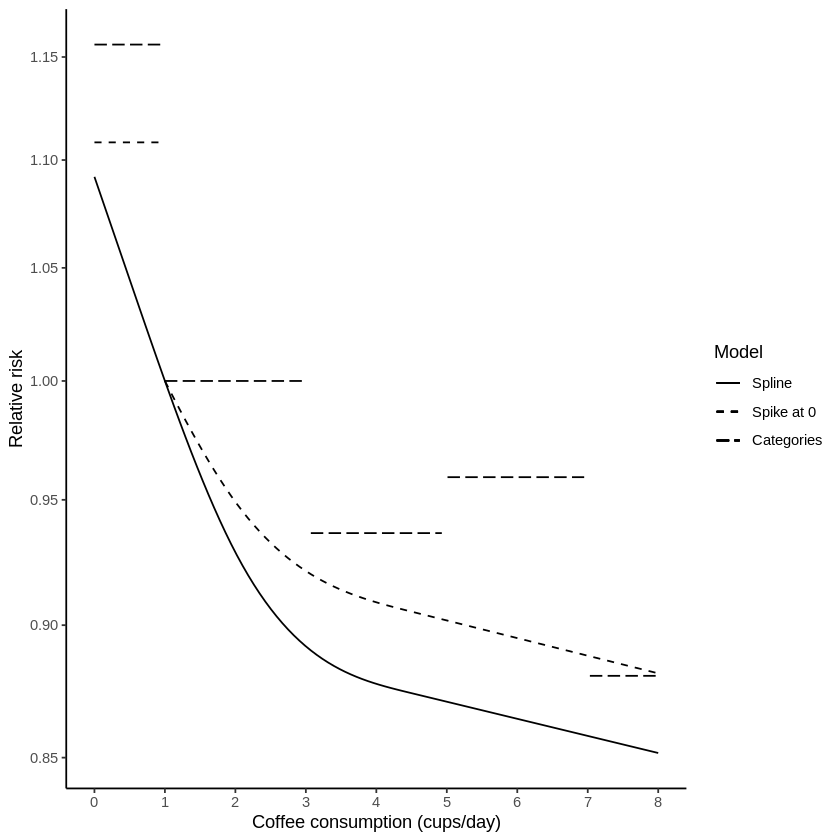

In [ ]:
# Figure 9
pred_modi <- cbind(pred_spl_ml, 
                   pred_spl_spike = pred_spl_spike$pred,
                   pred_categ = pred_categ$pred)

p <- ggplot(pred_modi, aes(dose, pred_spl, linetype = "Spline")) + 
  geom_line() +
  geom_line(data = subset(pred_modi, dose < 1), aes(y = pred_spl_spike, linetype = "Spike at 0")) +
  geom_line(data = subset(pred_modi, dose >= 1), aes(y = pred_spl_spike, linetype = "Spike at 0")) +
  scale_x_continuous(breaks = 0:8) +
  scale_y_continuous(trans = "log", breaks = c(.8, .85, .9, .95, 1, 1.05, 1.1, 1.15)) +
  labs(x = "Coffee consumption (cups/day)", y = "Relative risk", linetype = "Model") +
  scale_linetype_manual(values = c(`Spline` = "solid", `Spike at 0` = "dashed",
                                   `Categories` = "longdash")) +
  theme_classic()
for (i in seq_along(k2[-1])){
  p <- p + geom_line(data = subset(pred_modi, dose >= k2[i] & dose < k2[i+1]), 
                     aes(y = pred_categ, linetype = "Categories"))
}
p

In [ ]:
# comparison AIC
lapply(list(`spline` = spl_ml, `Categories` = categ, `Spike at 0` = spl_spike), AIC)

$spline
[1] -36.98965

$Categories
[1] 7.504696

$`Spike at 0`
[1] -28.42692

In [ ]:
# Meta-regression
spl_reg <- dosresmeta(logrr ~ rcs(dose, k), id = id, type = type, cases = cases, 
                      n = n, se = se, data = coffee_mort_add, covariance = "user", 
                      proc = "1stage", Slist = Slist, mod = ~ gender, method = "reml")
summary(spl_reg)
lmtest::lrtest(spl_reg, spl_ml)

Call:  dosresmeta(formula = logrr ~ rcs(dose, k), id = id, type = type, 
    cases = cases, n = n, data = coffee_mort_add, mod = ~gender, 
    se = se, covariance = "user", method = "reml", proc = "1stage", 
    Slist = Slist)

One-stage random-effects meta-regression
Estimation method: REML

Chi2 model: X2 = 20.0650 (df = 6), p-value = 0.0027

Fixed-effects coefficients
                             Estimate  Std. Error        z  Pr(>|z|)  95%ci.lb
rcs(dose, k)dose              -0.0848      0.0604  -1.4045    0.1602   -0.2031
rcs(dose, k)dose'              0.0252      0.0650   0.3880    0.6980   -0.1021
rcs(dose, k)dose:genderM      -0.0397      0.0744  -0.5338    0.5935   -0.1857
rcs(dose, k)dose':genderM      0.0964      0.0779   1.2375    0.2159   -0.0563
rcs(dose, k)dose:genderM/F     0.0462      0.0990   0.4666    0.6408   -0.1478
rcs(dose, k)dose':genderM/F    0.0019      0.1026   0.0189    0.9849   -0.1991
                             95%ci.ub   
rcs(dose, k)dose               0

,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9,10.76422,NA,NA,NA
2,5,23.49482,-4,25.46121,4.063111e-05


In [ ]:
# vpc plot
coffee_vpc <- coffee_mort_add %>%
  filter(se != 0) %>%
  mutate(
    `Spline` = vpc(spl),
    `Spline meta-regression` = vpc(spl_reg)
  ) %>%
  gather(curve, vpc, Spline:`Spline meta-regression`)

`geom_smooth()` using formula 'y ~ x'



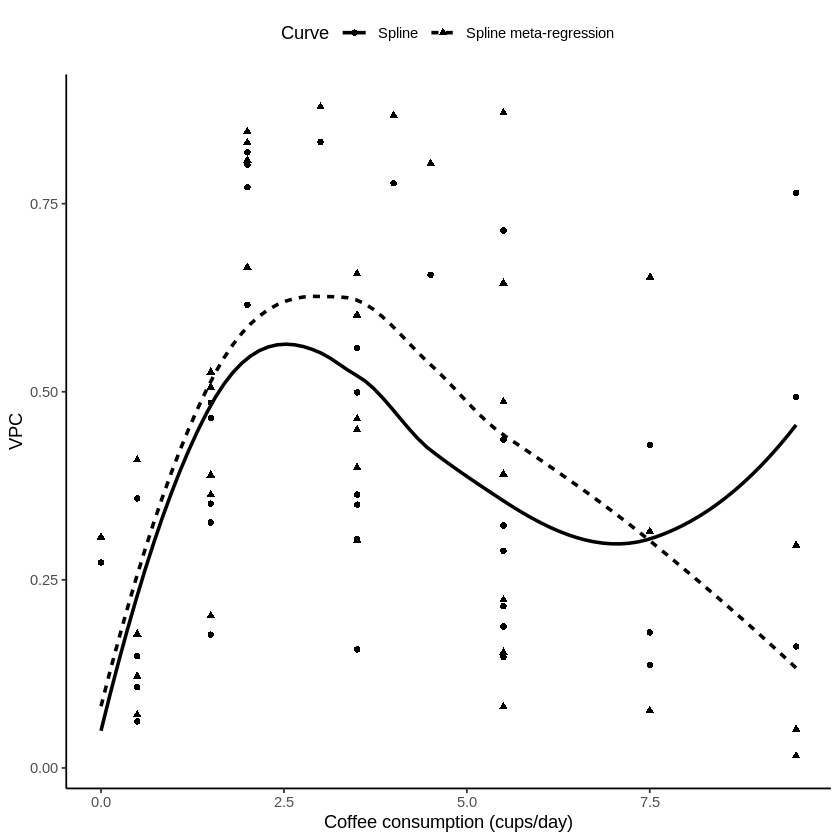

In [ ]:
# Figure 6
ggplot(coffee_vpc, aes(dose, vpc, group = curve)) +
  geom_point(aes(shape = curve)) +
  geom_smooth(aes(linetype = curve), method = "loess", se = F, col = "black") +
  labs(y = "VPC", x = "Coffee consumption (cups/day)", shape = "Curve", linetype = "Curve") + 
  theme_classic() + theme(legend.position = "top")